In [1]:
# load vgg model
from keras.applications.vgg16 import VGG16
# load the model
model = VGG16()
# summarize the model
model.summary()
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [2]:
# summarize filters in each convolutional layer
from matplotlib import pyplot
# summarize filter shapes
for layer in model.layers:
	# check for convolutional layer
	if 'conv' not in layer.name:
		continue
	# get filter weights
	filters, biases = layer.get_weights()
	print(layer.name, filters.shape)

block1_conv1 (3, 3, 3, 64)
block1_conv2 (3, 3, 64, 64)
block2_conv1 (3, 3, 64, 128)
block2_conv2 (3, 3, 128, 128)
block3_conv1 (3, 3, 128, 256)
block3_conv2 (3, 3, 256, 256)
block3_conv3 (3, 3, 256, 256)
block4_conv1 (3, 3, 256, 512)
block4_conv2 (3, 3, 512, 512)
block4_conv3 (3, 3, 512, 512)
block5_conv1 (3, 3, 512, 512)
block5_conv2 (3, 3, 512, 512)
block5_conv3 (3, 3, 512, 512)


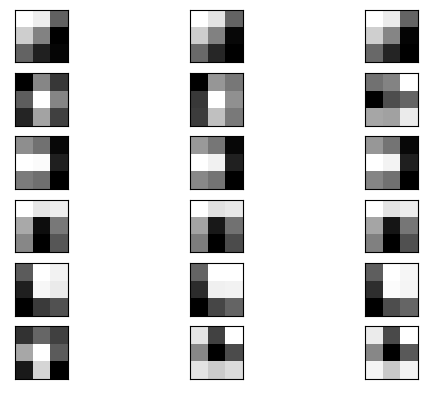

In [3]:
from keras.applications.vgg16 import VGG16
from matplotlib import pyplot
# retrieve weights from the second hidden layer
filters, biases = model.layers[1].get_weights()
# normalize filter values to 0-1 so we can visualize them
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)
# plot first few filters
n_filters, ix = 6, 1
for i in range(n_filters):
	# get the filter
	f = filters[:, :, :, i]
	# plot each channel separately
	for j in range(3):
		# specify subplot and turn of axis
		ax = pyplot.subplot(n_filters, 3, ix)
		ax.set_xticks([])
		ax.set_yticks([])
		# plot filter channel in grayscale
		pyplot.imshow(f[:, :, j], cmap='gray')
		ix += 1
# show the figure
pyplot.show()

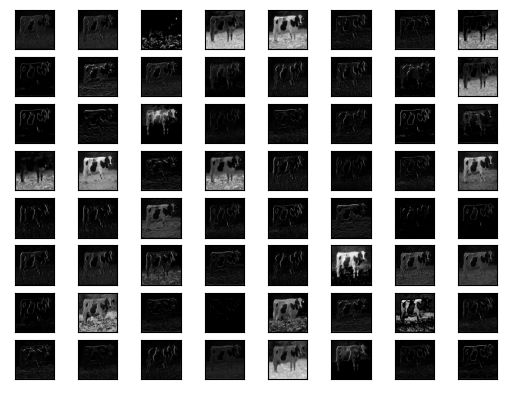

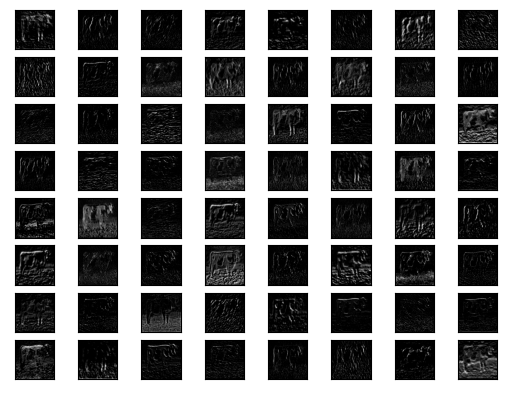

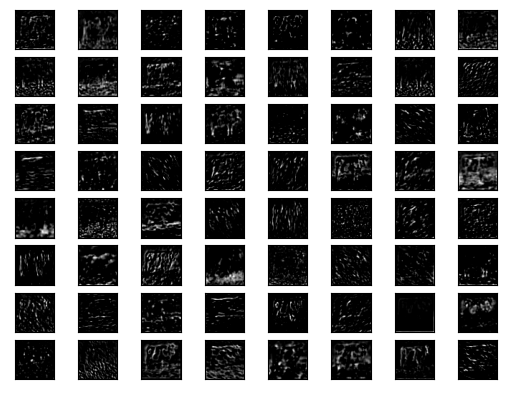

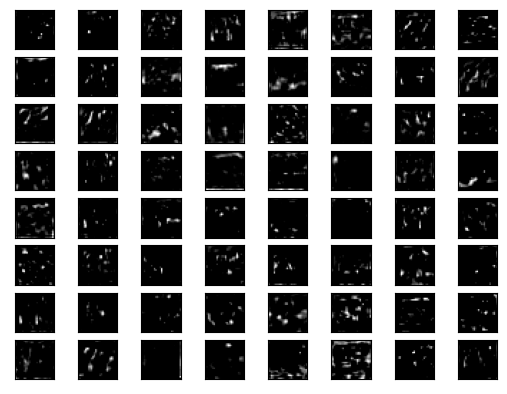

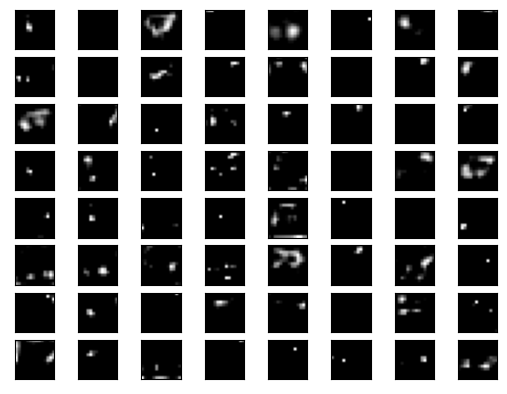

In [11]:

# visualize feature maps output from each block in the vgg model
from keras.applications.vgg16 import VGG16
from keras.models import Model
from matplotlib import pyplot
from numpy import expand_dims
# load the model
# redefine model to output right after the first hidden layer
ixs = [2, 5, 9, 13, 17]
outputs = [model.layers[i].output for i in ixs]
model = Model(inputs=model.inputs, outputs=outputs)
# load the image with the required shape
img = load_img('koe.jpg', target_size=(224, 224))
# convert the image to an array
img = img_to_array(img)
# expand dimensions so that it represents a single 'sample'
img = expand_dims(img, axis=0)
# prepare the image (e.g. scale pixel values for the vgg)
#img = preprocess_input(img)
# get feature map for first hidden layer
feature_maps = model.predict(img)
# plot the output from each block
square = 8
for fmap in feature_maps:
	# plot all 64 maps in an 8x8 squares
	ix = 1
	for _ in range(square):
		for _ in range(square):
			# specify subplot and turn of axis
			ax = pyplot.subplot(square, square, ix)
			ax.set_xticks([])
			ax.set_yticks([])
			# plot filter channel in grayscale
			pyplot.imshow(fmap[0, :, :, ix-1], cmap='gray')
			ix += 1
	# show the figure
	pyplot.show()

In [12]:

from keras.applications import vgg16
model = vgg16.VGG16()
img = load_img('koe.jpg',target_size=(224,224))
img = img_to_array(img)
img = expand_dims(img, axis=0)
prediction = model.predict(img)
print(prediction)


[[4.69080277e-07 8.26651672e-07 6.81305437e-07 2.36860774e-06
  2.36011492e-05 1.35103764e-05 2.02070396e-06 6.65733183e-04
  1.18836389e-04 3.01576307e-04 9.73181272e-07 3.33301728e-06
  1.24689251e-07 1.16313595e-06 2.84763786e-07 1.50587459e-06
  7.45300304e-06 4.46331251e-06 8.07224351e-05 1.27656847e-06
  4.39046653e-06 5.15916792e-04 4.52699569e-05 2.03532371e-04
  3.38513337e-06 4.75444858e-06 2.07013236e-05 8.02166312e-07
  8.54791324e-07 7.25257632e-05 2.10312032e-06 3.95729376e-06
  4.55346208e-06 5.31367095e-06 1.25688973e-06 1.30220883e-07
  3.25221578e-07 1.47525412e-07 3.53047944e-05 5.58687638e-08
  2.21649898e-07 1.99454405e-07 2.38332589e-07 1.82389115e-07
  2.81381773e-07 3.72204931e-06 1.31722345e-07 2.28367117e-06
  1.43856980e-07 3.90842706e-06 2.18938752e-07 2.91328456e-06
  3.41535042e-07 3.15788469e-07 9.64350761e-07 1.74851763e-07
  1.74481627e-07 5.82414366e-08 9.38876155e-07 2.89694270e-07
  3.49387989e-07 1.45251465e-06 4.94540700e-07 4.22240134e-07
  9.4052

In [13]:
vgg16.decode_predictions(prediction, top=10)

[[('n02403003', 'ox', 0.27855405),
  ('n02412080', 'ram', 0.17869996),
  ('n02415577', 'bighorn', 0.08956612),
  ('n02410509', 'bison', 0.029867833),
  ('n02109047', 'Great_Dane', 0.029141326),
  ('n02100236', 'German_short-haired_pointer', 0.024723383),
  ('n02091244', 'Ibizan_hound', 0.024100535),
  ('n02105412', 'kelpie', 0.021165028),
  ('n02417914', 'ibex', 0.015020237),
  ('n02395406', 'hog', 0.012304783)]]